# Data collection

Phần này chúng em thực hiện lấy dữ liệu từ file nhiều nguồn khác nhau, bao gồm nguồn từ Riot API và một số website chuyên về TFT như blitz.gg hoặc tftactics.gg,.... và phần này được chia công việc nhỏ ra để các bạn có thể cùng nhau tham gia nên sẽ có khá nhiều notebook khác nhau và có một số phần sẽ chạy khá lâu vì sự hạn chế của Riot API (100 requests mỗi 2 phút và số request khá lớn nên việc chạy lại chúng là khá lâu, vì thế chúng em sẽ sử dụng data đã được thu thập từ trước và xử lý trên chúng), phần code này sẽ được lưu trong folder Crawl_code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# Data exploration

## Khám phá dữ liệu về đội hình trong tập dữ liệu

### Đọc data từ file

In [2]:
data_team_df = pd.read_csv('../Data/process_data_tft_general_csv.csv', usecols=['Puuid', 'ID Match', 'Placement', 'List Augments', 'List Traits', 'List Champions', 'List Number Items', 'List Champions Tier'])

In [3]:
data_team_df[:10]

,Puuid,ID Match,Placement,List Augments,List Traits,List Champions,List Number Items,List Champions Tier
0,_NjJNkxpeKQ-po15A8N1GVKYqYTAjiN1WoqkVUGfwmpHqg...,KR_6267320509,1,"['TFT7_Augment_Preparation', 'TFT8_Augment_ViC...","['Set8_Aegis', 1, 0, 'Set8_Brawler', 2, 1, 'Se...","['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...","[1, 3, 0, 2, 3, 3, 0]","[2, 3, 2, 3, 3, 3, 1]"
1,WgAZ0CQHGmDf8yctPx5SXkU-rt-9HWv758OmfE6t_Wod8X...,KR_6267320509,4,"['TFT8_Augment_ChannelerTrait', 'TFT8_Augment_...","['Set8_Aegis', 2, 1, 'Set8_Channeler', 5, 2, '...","['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...","[1, 3, 1, 0, 0, 1, 3, 0]","[2, 3, 2, 2, 2, 2, 2, 1]"
2,WO7vH445Mvh-59sDpk4OAtffIxLMrm2R4wsrGT5ZcUb7cN...,KR_6267320509,7,"['TFT6_Augment_ItemGrabBag1', 'TFT8_Augment_Yu...","['Set8_Aegis', 1, 0, 'Set8_AnimaSquad', 1, 0, ...","['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...","[1, 0, 3, 0, 0, 3, 0, 1]","[2, 2, 3, 2, 2, 3, 2, 1]"
3,LjGpzsuqxxKX_8HDCyOmX5bBgwC-p59Oj7rTLhaSwOgN7U...,KR_6267320509,2,"['TFT6_Augment_SecondWind1', 'TFT8_Augment_Yas...","['Set8_Admin', 1, 0, 'Set8_AnimaSquad', 1, 0, ...","['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[0, 1, 1, 0, 1, 1, 3, 3]","[2, 2, 2, 2, 2, 2, 2, 2]"
4,XdejWcFYkQS2jJwSPR2FXlv_IZuw1txCPOLZJtUkqyusTn...,KR_6267320509,5,"['TFT6_Augment_ItemGrabBag1', 'TFT8_Augment_Yu...","['Set8_Admin', 1, 0, 'Set8_Aegis', 2, 1, 'Set8...","['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[0, 3, 1, 0, 1, 3, 1, 3]","[2, 2, 2, 2, 2, 2, 2, 2]"
5,CtB6YjZTon2Z-pYgNfubDLUKwxAZoBQcZVQ12LyNanULi3...,KR_6267320509,6,"['TFT6_Augment_TinyTitans', 'TFT8_Augment_Cami...","['Set8_Admin', 4, 2, 'Set8_Aegis', 1, 0, 'Set8...","['TFT8_Talon', 'TFT8_Blitzcrank', 'TFT8_Vi', '...","[0, 2, 0, 3, 0, 0, 1, 1]","[2, 2, 1, 3, 1, 2, 2, 2]"
6,y6gI4h6o614IhVvGBBp45jA-XhRHxqx2tleVdE0egluOSK...,KR_6267320509,3,"['TFT6_Augment_TinyTitans', 'TFT8_Augment_Sivi...","['Set8_Ace', 1, 1, 'Set8_Civilian', 1, 1, 'Set...","['TFT8_Sivir', 'TFT8_Velkoz', 'TFT8_Chogath', ...","[0, 0, 3, 0, 3, 3, 0, 1]","[2, 2, 3, 2, 2, 2, 2, 1]"
7,YFHBmecEZcAKDUkoNKCvM_--z5qekvafrDJzBgqJFz6l5a...,KR_6267320509,8,"['TFT6_Augment_ItemGrabBag1', 'TFT8_Augment_An...","['Set8_Admin', 1, 0, 'Set8_Aegis', 1, 0, 'Set8...","['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[0, 3, 1, 0, 3, 3, 1, 0]","[2, 2, 1, 2, 2, 1, 1, 1]"
8,y6gI4h6o614IhVvGBBp45jA-XhRHxqx2tleVdE0egluOSK...,KR_6267390363,6,"['TFT8_Augment_AnnieSupport', 'TFT6_Augment_Se...","['Set8_Admin', 1, 0, 'Set8_Aegis', 2, 1, 'Set8...","['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Sona', 'TFT8...","[0, 3, 0, 0, 3, 1, 1]","[2, 3, 2, 1, 2, 2, 2]"
9,GSXdu-IDqnhxAjE9OC-rEbktUy7Q-YfRmdz7P6nztlNYHj...,KR_6267390363,7,"['TFT8_Augment_RellCarry', 'TFT6_Augment_Luden...","['Set8_Aegis', 2, 1, 'Set8_Channeler', 2, 1, '...","['TFT8_Rell', 'TFT8_Yuumi', 'TFT8_Nilah', 'TFT...","[3, 0, 0, 1, 0, 1, 3, 0]","[2, 2, 2, 1, 1, 2, 1, 1]"


## Data exploration

Dữ liệu có bao nhiêu cột và hàng:

In [4]:
row, col = data_team_df.shape
row, col

(32000, 8)

Dữ liệu ở mỗi dòng sẽ là thông tin đội hình của 1 người chơi trong 1 trận đấu bao gồm mã người chơi, mã trận đấu, thứ hạng, danh sách tộc hệ kích hoạt, danh sách tướng, danh sách trang bị của từng tướng và danh sách cấp sao của các tướng.

Kiểm tra dữ liệu trùng:

In [5]:
have_duplicated_rows = data_team_df.duplicated().sum()
have_duplicated_rows

13904

Tổng cổng có 13904 đội hình bị trùng nhau trên tổng số 32000 đội hình. Sở dĩ con số lớn như vậy là do các người chơi có thể chơi cùng nhau rất nhiều trận nên việc lặp là khá nhiều.

### Loại bỏ các đội hình bị trùng trong các trận đấu:

In [6]:
data_team_df = data_team_df.drop_duplicates().reset_index(drop=True)
data_team_df[:10]

,Puuid,ID Match,Placement,List Augments,List Traits,List Champions,List Number Items,List Champions Tier
0,_NjJNkxpeKQ-po15A8N1GVKYqYTAjiN1WoqkVUGfwmpHqg...,KR_6267320509,1,"['TFT7_Augment_Preparation', 'TFT8_Augment_ViC...","['Set8_Aegis', 1, 0, 'Set8_Brawler', 2, 1, 'Se...","['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...","[1, 3, 0, 2, 3, 3, 0]","[2, 3, 2, 3, 3, 3, 1]"
1,WgAZ0CQHGmDf8yctPx5SXkU-rt-9HWv758OmfE6t_Wod8X...,KR_6267320509,4,"['TFT8_Augment_ChannelerTrait', 'TFT8_Augment_...","['Set8_Aegis', 2, 1, 'Set8_Channeler', 5, 2, '...","['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...","[1, 3, 1, 0, 0, 1, 3, 0]","[2, 3, 2, 2, 2, 2, 2, 1]"
2,WO7vH445Mvh-59sDpk4OAtffIxLMrm2R4wsrGT5ZcUb7cN...,KR_6267320509,7,"['TFT6_Augment_ItemGrabBag1', 'TFT8_Augment_Yu...","['Set8_Aegis', 1, 0, 'Set8_AnimaSquad', 1, 0, ...","['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...","[1, 0, 3, 0, 0, 3, 0, 1]","[2, 2, 3, 2, 2, 3, 2, 1]"
3,LjGpzsuqxxKX_8HDCyOmX5bBgwC-p59Oj7rTLhaSwOgN7U...,KR_6267320509,2,"['TFT6_Augment_SecondWind1', 'TFT8_Augment_Yas...","['Set8_Admin', 1, 0, 'Set8_AnimaSquad', 1, 0, ...","['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[0, 1, 1, 0, 1, 1, 3, 3]","[2, 2, 2, 2, 2, 2, 2, 2]"
4,XdejWcFYkQS2jJwSPR2FXlv_IZuw1txCPOLZJtUkqyusTn...,KR_6267320509,5,"['TFT6_Augment_ItemGrabBag1', 'TFT8_Augment_Yu...","['Set8_Admin', 1, 0, 'Set8_Aegis', 2, 1, 'Set8...","['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[0, 3, 1, 0, 1, 3, 1, 3]","[2, 2, 2, 2, 2, 2, 2, 2]"
5,CtB6YjZTon2Z-pYgNfubDLUKwxAZoBQcZVQ12LyNanULi3...,KR_6267320509,6,"['TFT6_Augment_TinyTitans', 'TFT8_Augment_Cami...","['Set8_Admin', 4, 2, 'Set8_Aegis', 1, 0, 'Set8...","['TFT8_Talon', 'TFT8_Blitzcrank', 'TFT8_Vi', '...","[0, 2, 0, 3, 0, 0, 1, 1]","[2, 2, 1, 3, 1, 2, 2, 2]"
6,y6gI4h6o614IhVvGBBp45jA-XhRHxqx2tleVdE0egluOSK...,KR_6267320509,3,"['TFT6_Augment_TinyTitans', 'TFT8_Augment_Sivi...","['Set8_Ace', 1, 1, 'Set8_Civilian', 1, 1, 'Set...","['TFT8_Sivir', 'TFT8_Velkoz', 'TFT8_Chogath', ...","[0, 0, 3, 0, 3, 3, 0, 1]","[2, 2, 3, 2, 2, 2, 2, 1]"
7,YFHBmecEZcAKDUkoNKCvM_--z5qekvafrDJzBgqJFz6l5a...,KR_6267320509,8,"['TFT6_Augment_ItemGrabBag1', 'TFT8_Augment_An...","['Set8_Admin', 1, 0, 'Set8_Aegis', 1, 0, 'Set8...","['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[0, 3, 1, 0, 3, 3, 1, 0]","[2, 2, 1, 2, 2, 1, 1, 1]"
8,y6gI4h6o614IhVvGBBp45jA-XhRHxqx2tleVdE0egluOSK...,KR_6267390363,6,"['TFT8_Augment_AnnieSupport', 'TFT6_Augment_Se...","['Set8_Admin', 1, 0, 'Set8_Aegis', 2, 1, 'Set8...","['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Sona', 'TFT8...","[0, 3, 0, 0, 3, 1, 1]","[2, 3, 2, 1, 2, 2, 2]"
9,GSXdu-IDqnhxAjE9OC-rEbktUy7Q-YfRmdz7P6nztlNYHj...,KR_6267390363,7,"['TFT8_Augment_RellCarry', 'TFT6_Augment_Luden...","['Set8_Aegis', 2, 1, 'Set8_Channeler', 2, 1, '...","['TFT8_Rell', 'TFT8_Yuumi', 'TFT8_Nilah', 'TFT...","[3, 0, 0, 1, 0, 1, 3, 0]","[2, 2, 2, 1, 1, 2, 1, 1]"


Số hàng và cột của dataframe sau khi loại bỏ các đội hình bị trùng:

In [7]:
row, col = data_team_df.shape
row, col

(18096, 8)

Ý nghĩa của từng cột:
- **Puuid**: id của các người chơi .
- **ID Match**: id của trận đấu.
- **Placement**: thứ hạng của các người chơi trong 1 trận đấu.
- **List Augments**: danh sách lõi nâng cấp trong trận đấu của 1 người chơi.
- **List Traits**: danh sách tộc, hệ được kích hoạt của 1 đội hình.
- **List Champions**: danh sách các tướng có trong 1 đội hình.

Kiểu dữ liệu của từng cột trong dataframe:

In [8]:
col_dtypes = data_team_df.dtypes
col_dtypes

Puuid                  object
ID Match               object
Placement               int64
List Augments          object
List Traits            object
List Champions         object
List Number Items      object
List Champions Tier    object
dtype: object

Dữ liệu có một số cột có kiểu dữ liệu là list nhưng mà khi đọc vào dataframe thì nó chuyển thành series và nó được hiểu là kiểu string nên ta cần chuyển nó lại dạng list

In [9]:
def changeStringToList(col_name, df):
    for i in range(len(col_name)):
        temp = []
        for j in range(len(df[col_name[i]])):
            temp.append(ast.literal_eval(df[col_name[i]][j]))
        df[col_name[i]] = temp

In [10]:
col_name_type_list = ['List Augments', 'List Champions', 'List Traits', 'List Number Items', 'List Champions Tier']
changeStringToList(col_name_type_list, data_team_df)

## Preprocess

### Kiểm tra dữ liệu bị trống

In [11]:
data_team_df.isna().sum()

Puuid                  0
ID Match               0
Placement              0
List Augments          0
List Traits            0
List Champions         0
List Number Items      0
List Champions Tier    0
dtype: int64

Không có những dữ liệu bị thiếu trong dataframe này.

Đối với cột dữ liệu 'Placement' ta có các thông số sau:

In [12]:
data_team_df['Placement'].min(), data_team_df['Placement'].max()

(1, 8)

Vị trí tốt nhất cho một người chơi là vị trí thứ 1, vị trí tệ nhất là vị trí thứ 8

### Thông tin về người chơi:

- Tổng số người chơi có trong tập dữ liệu

In [13]:
len(data_team_df['Puuid'].unique())

2449

- Tổng số trận đấu trong tập dữ liệu:

In [14]:
len(data_team_df['ID Match'].unique())

2262

Dựa trên dữ liệu này ta sẽ thấy được rằng số dữ liệu bị trùng ở trên tìm ra được là 13904, nó sẽ bằng với tổng số trận đấu trừ đi số trận bị trùng nhân với 8 (vì có 8 đội hình), vì 13904 = 32000 - 2262*8

- Người chơi có số trận đấu nhiều nhất là:

In [15]:
data_team_df['Puuid'].value_counts().max()

70

- Số lượng đội hình được sử dụng trong các trận đấu:

In [16]:
num_of_team = set()
for i in range(len(data_team_df['List Champions'])):
    num_of_team.add(str(data_team_df['List Champions'][i]))
len(num_of_team)

12530

## Khám phá dữ liệu về trang bị của tướng trong tập dữ liệu

### Đọc data từ dataframe

In [17]:
data_item_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=['Puuid','ID Match','Champion','List Name Item'])

In [18]:
data_item_df[:10]

,Puuid,ID Match,Champion,List Name Item
0,_NjJNkxpeKQ-po15A8N1GVKYqYTAjiN1WoqkVUGfwmpHqg...,KR_6267320509,"['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...","[['TFT_Item_ZekesHerald'], ['TFT_Item_BrambleV..."
1,WgAZ0CQHGmDf8yctPx5SXkU-rt-9HWv758OmfE6t_Wod8X...,KR_6267320509,"['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...","[['TFT8_Item_HeartEmblemItem'], ['TFT_Item_Bra..."
2,WO7vH445Mvh-59sDpk4OAtffIxLMrm2R4wsrGT5ZcUb7cN...,KR_6267320509,"['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...","[['TFT_Item_GargoyleStoneplate'], [], ['TFT_It..."
3,LjGpzsuqxxKX_8HDCyOmX5bBgwC-p59Oj7rTLhaSwOgN7U...,KR_6267320509,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[[], ['TFT8_Item_HackerEmblemItem'], ['TFT_Ite..."
4,XdejWcFYkQS2jJwSPR2FXlv_IZuw1txCPOLZJtUkqyusTn...,KR_6267320509,"['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[[], ['TFT_Item_WarmogsArmor', 'TFT_Item_Titan..."
5,CtB6YjZTon2Z-pYgNfubDLUKwxAZoBQcZVQ12LyNanULi3...,KR_6267320509,"['TFT8_Talon', 'TFT8_Blitzcrank', 'TFT8_Vi', '...","[[], ['TFT_Item_TitanicHydra', 'TFT_Item_Titan..."
6,y6gI4h6o614IhVvGBBp45jA-XhRHxqx2tleVdE0egluOSK...,KR_6267320509,"['TFT8_Sivir', 'TFT8_Velkoz', 'TFT8_Chogath', ...","[[], [], ['TFT_Item_TitansResolve', 'TFT_Item_..."
7,YFHBmecEZcAKDUkoNKCvM_--z5qekvafrDJzBgqJFz6l5a...,KR_6267320509,"['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[[], ['TFT_Item_WarmogsArmor', 'TFT_Item_Gargo..."
8,y6gI4h6o614IhVvGBBp45jA-XhRHxqx2tleVdE0egluOSK...,KR_6267390363,"['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Sona', 'TFT8...","[[], ['TFT_Item_GargoyleStoneplate', 'TFT_Item..."
9,GSXdu-IDqnhxAjE9OC-rEbktUy7Q-YfRmdz7P6nztlNYHj...,KR_6267390363,"['TFT8_Rell', 'TFT8_Yuumi', 'TFT8_Nilah', 'TFT...","[['TFT_Item_IonicSpark', 'TFT_Item_Redemption'..."


## Data exploration

Dữ liệu có bao nhiêu hàng và cột:

In [19]:
row, col = data_item_df.shape
row, col

(32000, 4)

In [20]:
have_duplicated_rows = data_item_df.duplicated('List Name Item').sum()
have_duplicated_rows

13909

Số lượng dữ liệu trùng cũng giống bên dữ liệu đội hình.

In [21]:
data_item_df = data_item_df.drop_duplicates().reset_index(drop = True)

Ý nghĩa của từng cột:
- **Puuid**: id của các người chơi .
- **ID Match**: id của trận đấu.
- **Champion**: danh sách tướng trong 1 đội hình.
- **List Augments**: danh sách trang bị ứng với từng tướng trong đội hình.

Kiểu dữ liệu của từng cột trong dataframe

In [22]:
col_dtypes = data_item_df.dtypes
col_dtypes

Puuid             object
ID Match          object
Champion          object
List Name Item    object
dtype: object

Có 2 cột dữ liệu dạng list nhưng khi lưu vào csv thì nó chuyển thành string nên ta cần chuyển nó trở lại về list

In [23]:
col_name_type_list = ['Champion', 'List Name Item']
changeStringToList(col_name_type_list, data_item_df)

## Preprocess

### Kiểm tra dữ liệu trống:

In [24]:
data_item_df.isna().sum()

Puuid             0
ID Match          0
Champion          0
List Name Item    0
dtype: int64

Không có dữ liệu bị trống trong dataframe này

# Thông tin về tướng và trang bị

- Tổng số tướng được sử dụng:

In [25]:
a = np.array(data_item_df['Champion'])
numbers_champ = set(i for j in a for i in j)
print(len(numbers_champ)) # 10

59


- Tổng số item được sử dụng

In [26]:
b = np.array(data_item_df['List Name Item'])
numbers_item = set()
for i in b:
    for j in i:
        for k in j:
            numbers_item.add(k)

len(numbers_item)

124

## TÍNH TOÁN VÀ VẼ BIỂU ĐỒ CỦA TƯỚNG VÀ LÕI NÂNG CẤP ĐỂ TRẢ LỜI CÂU HỎI: CÁC CHAMPION TRONG TỪNG TOP 1-> TOP 8 ĐƯỢC SỬ DỤNG VỚI TẦN SUẤT LÀ BAO NHIÊU VÀ VỊ TRÍ TRUNG BÌNH CỦA NÓ LÀ BAO NHIÊU?

#### file notebook chỉ để tính cho tướng (champion) còn lõi nâng cấp thì không được, bởi vì mục đích là trích xuất xử lý thông tin để người chơi có thể hiểu biết hơn về trò chơi nhưng các lõi nâng cấp hiển thị trong trò chơi khác với cách API lưu tên (gần 200 lõi với tên khác hoàn toàn hiển thị trong trò chơi) nên việc xử lý rất là khó khăn

In [27]:
import pandas as pd
import numpy as np
import ast
from itertools import chain
import matplotlib.pyplot as plt
import ast


#### Đọc dữ liệu lấy data về champion

In [28]:
'''
Lọc trùng theo mã trận đấu và danh sách đồ vì:
* Các người chơi sẽ gặp nhau ở các trận đấu nên mã trận đấu sẽ bị trùng giữa các thư mục ngườichơi
* Có 127 trang bị chia thành 4 loại, mỗi champion có tối đa 3 trang bị chưa kể 1 trận có từ 8-10 trang bị và 6-9 champion 
mà mỗi champion có thể để từ 0-3 trang bị nên số trường hợp tối đa là rất lớn mà dữ liệu đầu vào chỉ có 32000 đội hình nên các bộ trang bị
sẽ không thể bị trùng giữa 2 người chơi khác nhau được!
'''
champion_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'List Name Item', 'Champion']).drop_duplicates().reset_index(drop=True)
# champion_df = pd.read_csv('process_data_tft_each_item_csv.csv').drop_duplicates()


#### Lấy ra list Champion trong đội hình của người chơi

In [29]:
list_champions = []
for i in range(len(champion_df['Champion'])):
    list_champions.append(ast.literal_eval(champion_df['Champion'][i]))

#### Tìm ra danh sách champion được sử dụng nhiều nhất và ít nhất

ta giảm chiều list_champions lại bằng list(chain.from_iterable)

hàm zip dùng để biến 2 list được cho ra thành key và values

list(chain) dùng để ép mảng xuống còn 1D và sau đó sort lại

sau đó ta rút trích ra được những champion được sử dụng nhiều nhất và ít nhất

In [30]:
def get_best_worst_champions(list_champions):
    print(len(list_champions))
    flatten_list = list(chain.from_iterable(list_champions))

    flatten_list = np.array(flatten_list, dtype = object)

    unique, counts = np.unique(flatten_list, return_counts=True)
    
    a = dict(zip(unique, counts))
    b = dict(sorted(a.items(), key=lambda item: item[1]))

    best_champions = list(b.items())
    worst_champions = list(b.items())
    return best_champions,worst_champions

In [31]:
best_champions,worst_champions = get_best_worst_champions(list_champions)

18096


5 champion được dùng nhiều nhất và ít nhất

In [32]:
print(best_champions[-5:], worst_champions[:5])

[('TFT8_LeeSin', 5151), ('TFT8_Vi', 6196), ('TFT8_Sejuani', 6247), ('TFT8_Ekko', 8228), ('TFT8_Alistar', 8459)] [('TFT8_Poppy', 193), ('TFT8_Sylas', 394), ('TFT8_Draven', 571), ('TFT8_Ashe', 602), ('TFT8_Kayle', 655)]


Biểu đồ sử dụng của các champion đó

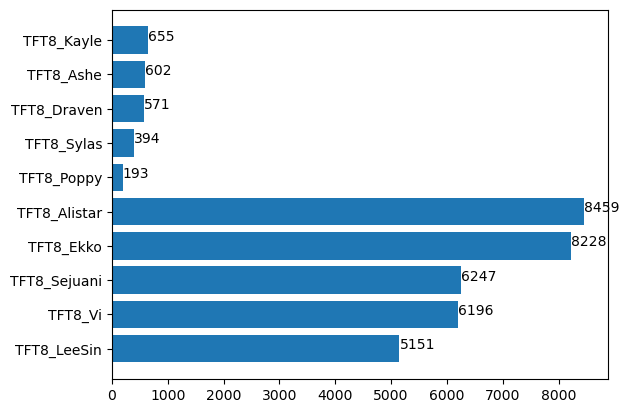

In [33]:
bar_chart = np.array(best_champions[-5:] + worst_champions[0:5])
bar_chart[:, 0]

x = bar_chart[:, 0]
y = bar_chart[:, 1]
y = y.astype('int64')

plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

Ta thấy 5 champion ít nhất có số lượng sử dụng cực kì thấp, chỉ bằng khoảng 8% so với champion được dùng nhiều nhất.

#### Vị trí trung bình các champion đó trong trận đấu

In [34]:
average_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                         'ID Match','List Name Item','Champion', 'Placement']).drop_duplicates().reset_index(drop=True)


chuyển đổi string sang list nhưng lần này ta để trong hàm để dễ sử dụng và nhìn trực quan hơn

In [35]:
def convert_string_to_list(ok, placement, column):
    temp = ok[ok.eq(placement).any(1)].reset_index(drop=True)
    top = []
    for i in range(len(temp)):
        top.append(ast.literal_eval(temp[column][i]))
    return top


lọc ra trong những top từ 1 đến 8 số lần champion đó được sử dụng. Vòng for để duyệt từng top, sau đó lấy ra số lần sử dụn champion đó

In [36]:
champion_on_top = {}
for i in range(1, 9, 1):
    temp = convert_string_to_list(average_df, i, 'Champion')
    temp1 = 'top_' + str(i)
    champion_on_top[temp1] = get_best_worst_champions(temp)


2262
2262
2262
2262
2262
2262
2262
2262


5 champion tốt nhất và tệ nhất mà người chơi top 1 sử dụng

nếu muốn xem các top khác thì chỉ cần thay đổi string"top_1" thành các top khác

In [37]:
best_champions_top_1, worst_champions_top_1 = champion_on_top['top_1']
print(best_champions_top_1, "\n", worst_champions_top_1)

[('TFT8_Poppy', 12), ('TFT8_Sylas', 41), ('TFT8_Ashe', 48), ('TFT8_Kayle', 59), ('TFT8_Rell', 63), ('TFT8_Draven', 70), ('TFT8_Jinx', 74), ('TFT8_Lulu', 79), ('TFT8_BelVeth', 90), ('TFT8_Lux', 110), ('TFT8_MissFortune', 117), ('TFT8_Talon', 117), ('TFT8_Senna', 120), ('TFT8_AurelionSol', 129), ('TFT8_Camille', 134), ('TFT8_Ezreal', 135), ('TFT8_WuKong', 144), ('TFT8_Fiora', 145), ('TFT8_Sett', 155), ('TFT8_Viego', 155), ('TFT8_Chogath', 179), ('TFT8_Zed', 179), ('TFT8_Yasuo', 187), ('TFT8_Renekton', 195), ('TFT8_Kaisa', 196), ('TFT8_Mordekaiser', 204), ('TFT8_Zac', 206), ('TFT8_Rammus', 211), ('TFT8_Sivir', 221), ('TFT8_Velkoz', 260), ('TFT8_Taliyah', 268), ('TFT8_Vayne', 289), ('TFT8_Nilah', 298), ('TFT8_Samira', 312), ('TFT8_Nasus', 322), ('TFT8_Blitzcrank', 343), ('TFT8_Aphelios', 370), ('TFT8_Annie', 385), ('TFT8_Sona', 385), ('TFT8_Jax', 389), ('TFT8_Leblanc', 417), ('TFT8_Riven', 423), ('TFT8_Syndra', 437), ('TFT8_Zoe', 444), ('TFT8_Galio', 452), ('TFT8_Urgot', 496), ('TFT8_Fiddl

#### TỈ LỆ CỦA CÁC CHAMPION ĐÓ TRONG TRẬN ĐẤU VÀ SỐ LẦN XUẤT HIỆN CỦA CHAMPION TRONG TỪNG TOP CỦA TRẬN ĐẤU

In [38]:
all_champion_df = pd.read_csv("../Data/process_data_champion_tft.csv", usecols=['Champion'])

In [39]:
all_champions = all_champion_df['Champion'].to_list()


champion_avg_top: vị trí trung bình của champ khi ở trong top từ 1 đến 8

Nghĩa là khi champ đó được sử dụng thì trung bình bạn sẽ vào được top mấy

champion_avg_on_match: tỉ lệ số trận đấu từ top 1 đến 8 mà champ đó được sử dụng

Nghĩa là tần suất sử dụng của champ đó trong từng top

In [40]:
sum = 0
temp = 0
champion_avg_top = []
champion_avg_on_match = []
match_each_top = []
for champion in all_champions:
    temp1 = []
    temp2 = []
    for i in range(1, 9, 1):
        cc = dict(champion_on_top['top_' + str(i)][0])

        if(champion in cc):
            temp = temp+dict(champion_on_top['top_' + str(i)][0])[champion]*i
            sum = sum + (dict(champion_on_top['top_' + str(i)][0])[champion])
            
        temp2.append(sum/32000)
        champion_avg_on_match.append(temp2)
    temp1.append(temp/sum)
    champion_avg_top.append(temp1)
    temp = 0
    sum = 0


In [41]:
print(champion_avg_top[0], champion_avg_on_match[0])

[4.26350632462466] [0.0388125, 0.07509375, 0.1094375, 0.14328125, 0.17565625, 0.2071875, 0.23825, 0.26434375]


như ta thấy ở đây, champ đầu tiên sẽ có avg_top là 4.26: nghĩa là nếu sử dụng champ đó thì vị trí trung bình ta sẽ đạt được là 4.26 và avg_on_match là trong từng top 1 -> 8 thì tần suất xuất hiện là bao nhiêu

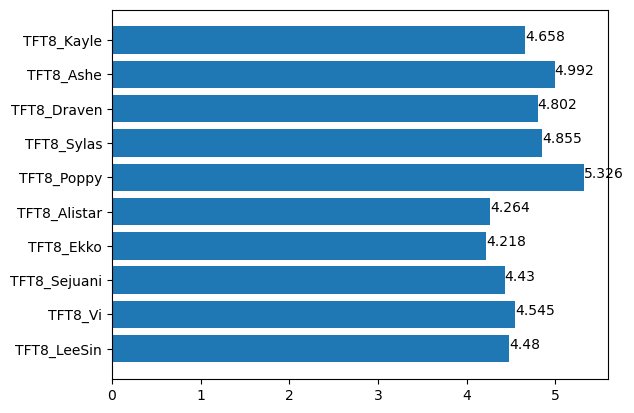

In [42]:
bar_chart[:, 0]
avg_placement_5_worst_best_champions = []
for i in bar_chart[:, 0]:
    avg_placement_5_worst_best_champions.append(
        champion_avg_top[all_champions.index(i)][0])


y = avg_placement_5_worst_best_champions
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value, 3)))

plt.show()


Ta có thể thấy các champion ít sử dụng có vị trí trung bình thấp hơn những champion được sử dụng nhiều nhất, chứng tỏ những champion này chưa thực sự hữu ích dành cho người chơi. Lí do bởi vì những champion này vì những champion này bị out meta

Biểu đồ của 5 champion có vị trí trung bình cao nhất:

In [43]:
ind = np.argpartition(np.array(champion_avg_top), 5, axis=0)[:5]
ind


array([[48],
       [23],
       [45],
       [31],
       [12]], dtype=int64)

In [44]:
name_placement_5_best_champions = []
avg_placement_5_best_champions = []
for i in range(5):
    name_placement_5_best_champions.append(all_champions[ind[i][0]])
    avg_placement_5_best_champions.append(champion_avg_top[ind[i][0]][0])
avg_placement_5_best_champions


[3.572199730094467,
 3.619876774712028,
 3.630266552020636,
 3.645412130637636,
 3.7021654242101527]

In [45]:
y = name_placement_5_best_champions

x = avg_placement_5_best_champions
y = name_placement_5_best_champions
x, y

([3.572199730094467,
  3.619876774712028,
  3.630266552020636,
  3.645412130637636,
  3.7021654242101527],
 ['TFT8_Urgot', 'TFT8_Leona', 'TFT8_Syndra', 'TFT8_Nunu', 'TFT8_Fiddlesticks'])

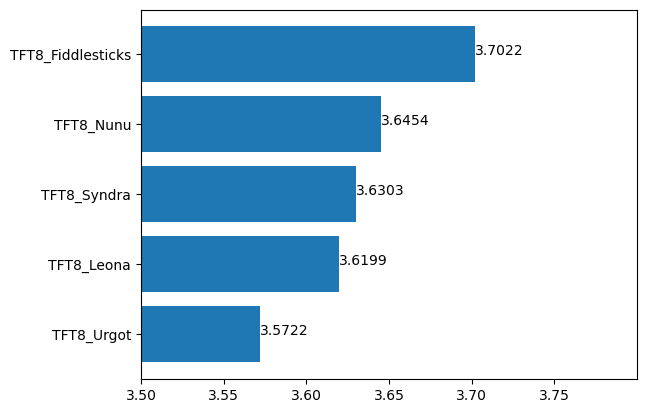

In [46]:
x = name_placement_5_best_champions
y = avg_placement_5_best_champions
fig, ax = plt.subplots()
plt.barh(x, y)
ticks_loc = np.arange(3.5, 3.8, step=0.05)
ax.set_xticks(ticks_loc)
ax.set_xlim(3.5, 3.8)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value, 4)))

plt.show()


Đây là những champion có vị trí trung bình cao nhất, dù vị trí trung bình chênh nhau rất nhỏ nhưng với vị trí trung bình cao như vậy thì sự ảnh hưởng của nó tới meta rất lớn

## ĐỂ XÂY DỰNG MỘT ĐỘI HÌNH MẠNH THÌ TA CẦN NHỮNG GÌ ?
Đó là cần những vị tướng mạnh, cầm những món trang bị tốt và kích hoạt những tộc hệ hợp lí cho chúng. Vậy ta sẽ làm thế nào để tìm ra những thứ đó thì chúng ta sẽ thực hiện ngay bên dưới đây thôi.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from itertools import chain

### ĐỌC DỮ LIỆU ĐỂ LẤY TẤT CẢ CÁC MÓN ĐỒ

In [48]:
'''
Lọc trùng theo mã trận đấu và danh sách đồ vì:
* Các người chơi sẽ gặp nhau ở các trận đấu nên mã trận đấu sẽ bị trùng giữa các thư mục ngườichơi
* Có 127 trang bị chia thành 4 loại, mỗi champion có tối đa 3 trang bị chưa kể 1 trận có từ 8-10 trang bị và 6-9 champion 
mà mỗi champion có thể để từ 0-3 trang bị nên số trường hợp tối đa là rất lớn mà dữ liệu đầu vào chỉ có 32000 đội hình nên các bộ trang bị
sẽ không thể bị trùng giữa 2 người chơi khác nhau được!
'''
item_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'List Name Item']).drop_duplicates().reset_index(drop=True)
# item_df = pd.read_csv('process_data_tft_each_item_csv.csv').drop_duplicates()

In [49]:
len(item_df)

18096

### LẤY RA SỐ LƯỢNG ĐỒ CÓ TRONG TRẬN ĐẤU

ast.literak_eval: dùng để biến đổi string thành list

In [50]:
list_items = []
for i in range(len(item_df['List Name Item'])):
    list_items.append(ast.literal_eval(item_df['List Name Item'][i])) 

### TÌM RA MÓN ĐỒ ĐƯỢC SỬ DỤNG NHIỀU NHẤT VÀ ÍT NHẤT

hàm zip dùng để biến 2 list được cho ra thành key và values

lisst(chain) dùng để ép mảng xuống còn 1D và sau đó sort lại

In [51]:
def get_best_worst_items(list_items):
    flatten_list = list(chain.from_iterable(list_items))
    flatten_list = list(chain.from_iterable(flatten_list))
    flatten_list = np.array(flatten_list, dtype = object)
    unique, counts = np.unique(flatten_list, return_counts=True)
    a = dict(zip(unique, counts))
    b = dict(sorted(a.items(), key=lambda item: item[1]))
    best_item = list(b.items())
    worst_item = list(b.items())[0:5]
    return best_item, worst_item

In [52]:
best_item,worst_item = get_best_worst_items(list_items)

5 món đồ tốt nhất và tệ nhất

In [53]:
bar_chart = np.array(best_item[-5:] + worst_item)
bar_chart[:, 0]

array(['TFT_Item_WarmogsArmor', 'TFT_Item_IonicSpark', 'TFT_Item_RedBuff',
       'TFT_Item_JeweledGauntlet', 'TFT_Item_MadredsBloodrazor',
       'TFT5_Item_MorellonomiconRadiant',
       'TFT5_Item_ShroudOfStillnessRadiant',
       'TFT5_Item_FrozenHeartRadiant', 'TFT5_Item_LastWhisperRadiant',
       'TFT5_Item_RedemptionRadiant'], dtype='<U34')

In [54]:
x = bar_chart[:, 0]
y = bar_chart[:, 1]
y = y.astype('int64')
# temp = pd.DataFrame(data= {'col1': x, 'col2': y}).sort_values(by='col2')
# temp.plot.bar(x='col1', y='col2')

In [55]:
x, y

(array(['TFT_Item_WarmogsArmor', 'TFT_Item_IonicSpark', 'TFT_Item_RedBuff',
        'TFT_Item_JeweledGauntlet', 'TFT_Item_MadredsBloodrazor',
        'TFT5_Item_MorellonomiconRadiant',
        'TFT5_Item_ShroudOfStillnessRadiant',
        'TFT5_Item_FrozenHeartRadiant', 'TFT5_Item_LastWhisperRadiant',
        'TFT5_Item_RedemptionRadiant'], dtype='<U34'),
 array([6312, 6347, 7694, 8427, 9805,   12,   12,   14,   14,   14],
       dtype=int64))

Biểu đồ số lượng sử dụng của các trang bị (giữa 5 món nhiều nhất và 5 món ít nhất):

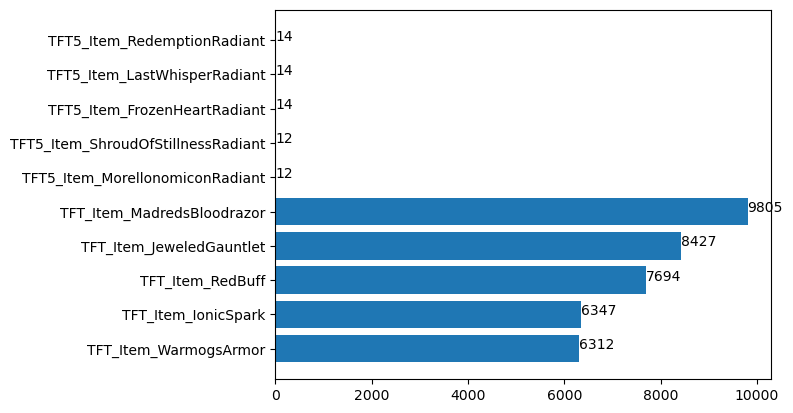

In [56]:
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

Ta thấy 5 món đồ ít nhất có số lượng sử dụng cực kì thấp, chỉ bằng khoảng 0,1% so với món dùng nhiều nhất. Vậy ta có nên sử dụng những món đồ có tỉ lệ sử dụng cao ở trên hay không, cùng tìm hiểu ở phần tiếp theo nhé.

### TÌM VỊ TRÍ TRUNG BÌNH CỦA MÓN ĐỒ ĐÓ TRONG TRẬN ĐẤU

Khi người chơi sử dụng món đồ đó thì sẽ được lọt vào top mấy của game

In [57]:
average_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols = ['Puuid', 'Placement', 'List Name Item']).drop_duplicates().reset_index(drop = True)

Chuyển đổi từ string sang list bởi vì đọc từ csv ra các list sẽ bị chuyển thành string

In [58]:
def convert_string_to_list(ok, placement, column):
    temp = ok[ok.eq(placement).any(1)].reset_index(drop=True)
    top = []
    for i in range(len(temp)):
        top.append(ast.literal_eval(temp[column][i]))
    return top

Lọc ra trong những top từ 1 đến 8 số lần item đó được sử dụng

In [59]:
item_on_top = {}
for i in range(1,9,1):
    temp = convert_string_to_list(average_df, i, 'List Name Item')
    temp1 = 'top_' + str(i)
    item_on_top[temp1] = get_best_worst_items(temp)

Top 5 những item được sử dụng khi người chơi đạt top 1 (thấp đến cao)

In [60]:
best_item_top_1, worst_item_top_1 = item_on_top['top_1']
print(best_item_top_1[-5:], "                ", worst_item_top_1[-5:])

[('TFT_Item_SeraphsEmbrace', 1054), ('TFT_Item_IonicSpark', 1114), ('TFT_Item_JeweledGauntlet', 1184), ('TFT_Item_RedBuff', 1194), ('TFT_Item_MadredsBloodrazor', 1510)]                  [('TFT5_Item_RapidFirecannonRadiant', 1), ('TFT5_Item_StatikkShivRadiant', 1), ('TFT5_Item_ArchangelsStaffRadiant', 2), ('TFT5_Item_ChaliceOfPowerRadiant', 2), ('TFT5_Item_GargoyleStoneplateRadiant', 2)]


### TỈ LỆ CỦA MÓN ĐỒ ĐÓ TRONG TRẬN ĐẤU VÀ SỐ LẦN XUẤT HIỆN CỦA MÓN ĐỒ TRONG TỪNG TOP CỦA TRẬN ĐẤU

In [61]:
all_item_df = pd.read_csv("../Data/item_tft_csv.csv", usecols=["Item"])

In [62]:
all_items = all_item_df['Item'].to_list()

item_avg_top: vị trí trung bình của món đồ khi ở trong top từ 1 đến 8

item_avg_on_match: tỉ lệ số trận đấu từ top 1 đến 8 mà món đồ đó được sử dụng

In [63]:
item_avg_top = []
item_avg_on_match = []
match_each_top = []
for item in all_items:
    temp = 0
    sum = 0
    temp1 = []
    for i in range(1,9,1):
        index_top = dict(item_on_top['top_' + str(i)][0])
        if(item in index_top):
            temp = temp+dict(item_on_top['top_' + str(i)][0])[item]*i
            sum = sum + (dict(item_on_top['top_' + str(i)][0])[item])
    temp1.append(temp/sum)
    item_avg_top.append(temp1)


In [64]:
avg_placement_5_worst_best_item = []
for i in bar_chart[:, 0]:
    avg_placement_5_worst_best_item.append(item_avg_top[all_items.index(i)][0])

Biểu đồ vị trí trung bình của 5 món trang bị dùng ít nhất và dùng nhiều nhất:

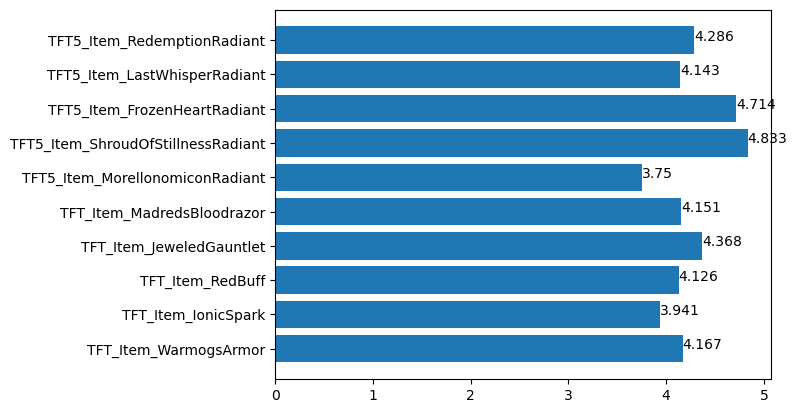

In [65]:
y = avg_placement_5_worst_best_item
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value, 3)))

plt.show()

Ta có thể thấy các món đồ ít sử dụng có vị trí trung bình thấp hơn những món được sử dụng nhiều nhất, chứng tỏ những món này chưa thực sự hữu ích dành cho người chơi (và trên thực tế những món đồ này khá là khó kiếm do nó là trang bị đặc biệt và có những trang bị đặc biệt khác mạnh hơn chúng nhiều nên chúng ít được người chơi sử dụng). Tuy nhiên vẫn có 1 trường hợp đặc biệt với món trang bị 'MorellonomiconRadiant' khi nó có vị trí trung bình khá cao nhưng vẫn ít được sử dụng, có thể người chơi chưa nhận ra sức mạnh của nó chăng ?

Từ đó ta có thể rút ra nhận xét rằng những món đồ phổ biến kia được dùng nhiều như vậy bởi lẽ nó thực sự là hữu ích và có sức mạnh cao hơn so với những món đồ thuộc top dưới vì vậy hãy tận dụng chúng để có thể dành được top cao. Những cũng đừng quên có một vài trang bị tuy chưa được đánh giá cao nhưng vẫn có một sức mạnh khá tốt như món trang bị 'MorellonomiconRadiant' kia, hãy thử và cảm nhận chúng thế nào

Biểu đồ của 5 món trang bị có vị trí trung bình cao nhất:

In [66]:
ind = np.argpartition(np.array(item_avg_top), 5, axis=0)[:5]
ind

array([[41],
       [85],
       [28],
       [ 6],
       [34]], dtype=int64)

In [67]:
name_placement_5_best_item = []
avg_placement_5_best_item = []
for i in range(5):
    name_placement_5_best_item.append(all_items[ind[i][0]])
    avg_placement_5_best_item.append(item_avg_top[ind[i][0]][0])
avg_placement_5_best_item

[3.1153846153846154, 1.0991189427312775, 3.125, 3.444, 3.4375]

In [68]:
y = name_placement_5_best_item
y

['TFT5_Item_TrapClawRadiant',
 'TFT_Item_EmptyBag',
 'TFT5_Item_LocketOfTheIronSolariRadiant',
 'TFT4_Item_OrnnRanduinsSanctum',
 'TFT5_Item_RunaansHurricaneRadiant']

In [69]:
x = avg_placement_5_best_item
y = name_placement_5_best_item
x, y

([3.1153846153846154, 1.0991189427312775, 3.125, 3.444, 3.4375],
 ['TFT5_Item_TrapClawRadiant',
  'TFT_Item_EmptyBag',
  'TFT5_Item_LocketOfTheIronSolariRadiant',
  'TFT4_Item_OrnnRanduinsSanctum',
  'TFT5_Item_RunaansHurricaneRadiant'])

Biểu đồ của 5 món trang bị có vị trí trung bình cao nhất:

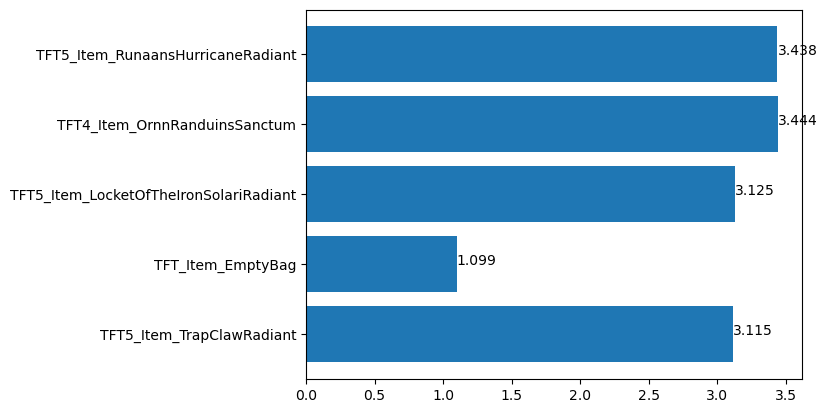

In [70]:
x = name_placement_5_best_item
y = avg_placement_5_best_item
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value,3)))

plt.show()

Đây là những trang bị có vị trí trung bình cao nhất, tuy nhiên trong đây có một món trang bị đặc thù là 'EmptyBag' nhưng món đồ này là một món đặc biệt được tạo ra từ 1 item khác có tên là 'TFT_Item_ThiefsGloves' nên ta sẽ xem đây như là 1 trường hợp ngoại lệ.

Còn đây là vị trí trung bình của các món trang bị có tỉ lệ top cao nhất, bạn nên sở hữu chúng ngay khi có thể để giành chiến thắng nhé

## TƯƠNG TỰ VỚI TỘC VÀ HỆ

#### Đọc dữ liệu để lấy hệ và tộc

In [71]:
traits_df = pd.read_csv('../Data/process_data_tft_general_csv.csv', usecols = ['ID Match','List Traits','List Number Items']).drop_duplicates().reset_index(drop=True)

In [72]:
list_traits = []

for i in range(len(traits_df['List Traits'])):
    list_traits.append(ast.literal_eval(traits_df['List Traits'][i])) 

### TÌM RA TỘC HỆ ĐƯỢC SỬ DỤNG NHIỀU NHẤT VÀ ÍT NHẤT

In [73]:
def get_best_worst_traits(list_traits):
    flatten_list = list(chain.from_iterable(list_traits))
    flatten_list = np.array(flatten_list, dtype = object)
    cc = flatten_list[0::3]
    unique, counts= np.unique(cc, return_counts=True)
    a = dict(zip(unique, counts))
    b = dict(sorted(a.items(), key=lambda item: item[1]))
    best_traits = list(b.items())
    worst_traits = list(b.items())[:5]
    return best_traits, worst_traits

In [74]:
a, b = get_best_worst_traits(list_traits)
print(a,"                ", b)

[('Set8_Arsenal', 2083), ('Set8_Corrupted', 2743), ('Set8_Forecaster', 3248), ('Set8_Deadeye', 3851), ('Set8_Recon', 4189), ('Set8_Ace', 4514), ('Set8_Renegade', 4654), ('Set8_Defender', 5130), ('Set8_Supers', 5689), ('Set8_Hacker', 5996), ('Set8_Civilian', 6227), ('Set8_ExoPrime', 6245), ('Set8_Admin', 6911), ('Set8_Threat', 7052), ('Set8_GenAE', 7400), ('Set8_Duelist', 7559), ('Set8_Channeler', 8131), ('Set8_AnimaSquad', 8222), ('Set8_SpaceCorps', 8809), ('Set8_Prankster', 9558), ('Set8_Heart', 9802), ('Set8_UndergroundThe', 10438), ('Set8_OxForce', 10648), ('Set8_Mascot', 11301), ('Set8_Brawler', 11791), ('Set8_StarGuardian', 12293), ('Set8_Aegis', 13821)]                  [('Set8_Arsenal', 2083), ('Set8_Corrupted', 2743), ('Set8_Forecaster', 3248), ('Set8_Deadeye', 3851), ('Set8_Recon', 4189)]


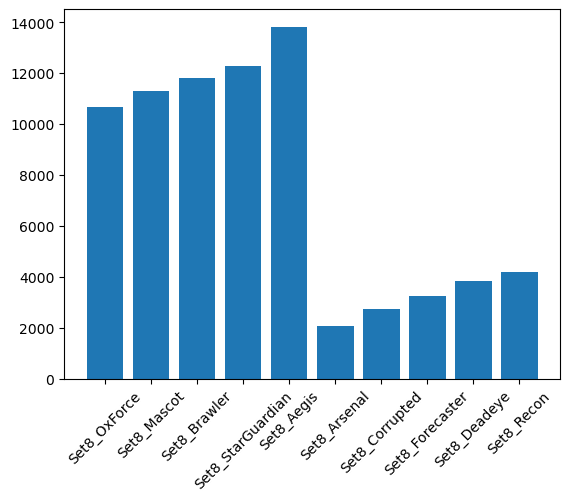

In [75]:
x = np.array(a[-5:] + a[:5])
x = x[:, 0]
y = np.array(a[-5:] + a[:5])
y = np.array(y[:, 1])
y = y.astype('int64')
plt.bar(x = x, height=y, )
plt.xticks(rotation=45)
plt.show()

Đối với tộc hệ ta nên chọn những tộc hệ được dùng nhiều, bởi chúng có sức mạnh tốt và được nhiều người tin tưởng để sử dụng chúng nhằm giành vị trí cao.

### VỊ TRÍ TRUNG BÌNH CỦA TỘC VÀ HỆ

Vì Puuid thay đổi theo thời gian nên list các tộc hệ sẽ bị trùng rất nhiều dẫn đến số lwuonjg trận đấu khác biệt sẽ nhỏ hơn số lượng thu thập

In [76]:
list_traits_df = pd.read_csv('../Data/process_data_tft_general_csv.csv', usecols= ['Placement', 'List Traits','ID Match']).drop_duplicates().reset_index(drop=True)

Tộc và hệ tốt nhất và tệ nhất ở top 1

In [77]:
all_traits = list_traits_df['List Traits'].to_list()

In [78]:
traits_on_top = {}
for i in range(1,9,1):
    temp = convert_string_to_list(list_traits_df, i, 'List Traits')
    temp1 = 'top_' + str(i)
    traits_on_top[temp1] = get_best_worst_traits(temp)

In [79]:
best_traits_on_top_1, worst_traits_on_top_1 = traits_on_top['top_1']
print(best_traits_on_top_1, "              ", worst_traits_on_top_1)

[('Set8_Arsenal', 368), ('Set8_Recon', 379), ('Set8_Deadeye', 535), ('Set8_Corrupted', 541), ('Set8_Defender', 588), ('Set8_Ace', 615), ('Set8_Hacker', 628), ('Set8_Forecaster', 633), ('Set8_Renegade', 803), ('Set8_Admin', 838), ('Set8_Supers', 877), ('Set8_Duelist', 893), ('Set8_GenAE', 1003), ('Set8_AnimaSquad', 1025), ('Set8_SpaceCorps', 1031), ('Set8_ExoPrime', 1035), ('Set8_Civilian', 1046), ('Set8_Threat', 1081), ('Set8_Channeler', 1123), ('Set8_Prankster', 1179), ('Set8_UndergroundThe', 1306), ('Set8_Heart', 1423), ('Set8_Brawler', 1446), ('Set8_OxForce', 1450), ('Set8_Mascot', 1575), ('Set8_StarGuardian', 1626), ('Set8_Aegis', 1859)]                [('Set8_Arsenal', 368), ('Set8_Recon', 379), ('Set8_Deadeye', 535), ('Set8_Corrupted', 541), ('Set8_Defender', 588)]


In [80]:
bar_chart = np.array(best_traits_on_top_1[-5:] + worst_traits_on_top_1)
best_traits_on_top_1[-5:]

[('Set8_Brawler', 1446),
 ('Set8_OxForce', 1450),
 ('Set8_Mascot', 1575),
 ('Set8_StarGuardian', 1626),
 ('Set8_Aegis', 1859)]

In [81]:
x = bar_chart[:, 0]
y = bar_chart[:, 1]
y = y.astype('int64')

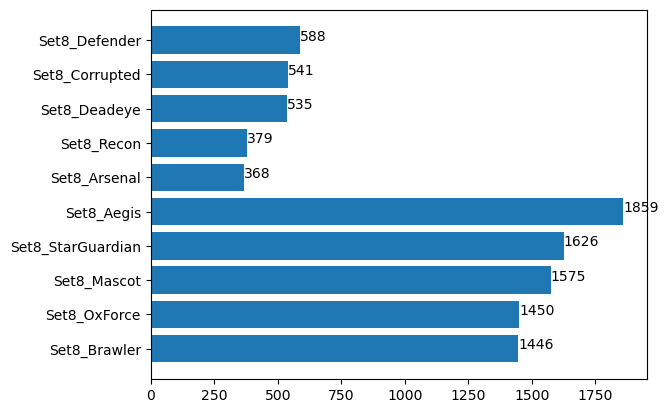

In [82]:
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

Nếu bạn giành vị trí đầu tiên thì những tộc hệ sau đây không nên bỏ qua vì đây là các tộc hệ mà những người chơi top 1 hay sử dụng nhất đó.

### TỈ LỆ CỦA TỘC HỆ ĐÓ TRONG TRẬN ĐẤU VÀ SỐ LẦN XUẤT HIỆN CỦA TỘC HỆ TRONG TỪNG TOP CỦA TRẬN ĐẤU

traits_avg_top: tộc hệ trung bình trong các top trận đấu

traits_avg_on_match: tần suất xuất hiện của tộc hệ trong trận đấu

In [83]:
all_traits_df = pd.read_csv('../Data/TocHe.csv', usecols=['Trait'])

In [84]:
all_traits = all_traits_df['Trait'].to_list()

traits_avg_top:  vị trí trung bình của tộc hệ khi ở trong top từ 1 đến 8

traits_avg_on_match: tỉ lệ số trận đấu từ top 1 đến 8 mà tộc hệ đó được sử dụng

In [85]:
sum = 0
temp = 0
traits_avg_top = []
traits_avg_on_match = []
for item in all_traits:
    temp1 = []
    temp2 = []
    for i in range(1,9,1):
        cc = dict(traits_on_top['top_' + str(i)][0])
        if(item in cc):
            temp = temp+dict(traits_on_top['top_' + str(i)][0])[item]*i
            sum = sum + (dict(traits_on_top['top_' + str(i)][0])[item]) 
        temp2.append(sum/len(list_traits_df))
        traits_avg_on_match.append(temp2)
    temp1.append(temp/sum)
    traits_avg_top.append(temp1)
    
    temp = 0
    sum = 0

# Liệu những champion nào sẽ được dùng cùng nhau nhiều nhất trong các trận đấu của những người chơi? Câu hỏi tương tự với các trang bị?

In [86]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from apyori import apriori
from sklearn.datasets import load_iris
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


### Đọc data

In [87]:
# To make sure the first row is not thought of as the heading
dataset = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'List Name Item', 'Champion']).drop_duplicates().reset_index(drop=True)


## Sử dụng thuật khai thác mẫu phổ biến với cây FP để tìm ra các tập hợp có support nhiều nhất tương ứng với sử dụng nhiều nhất (Apriori không được sử dụng vì số transaction rất nhiều nên sẽ bị time out)

### Với các Champion 
Đầu tiên tạo mảng 2 chiều lưu danh sách các đội hình chứa các champion của mõi người chơi

In [88]:
list_items = []
for i in range(len(dataset['Champion'])):
    list_items.append(ast.literal_eval(dataset['Champion'][i]))


Sử dụng apply valuecounts để tạo dataframe 2 chiều với index là tất cả trận đấu còn column là tên các champion của trò chơi, mỗi hàng là 1 transaction, vì đôi lúc người chơi sẽ dùng 2 champion trùng nhau trong 1 trận đấu nên thay thế các số 2, 3, 4 thành 1 để FP tree hoạt động được

In [89]:
df_champion = pd.DataFrame(list_items).apply(pd.value_counts, 1).fillna(0)

In [90]:
df_champion = df_champion.replace(2, 1)
df_champion = df_champion.replace(3, 1)
df_champion = df_champion.replace(4, 1)


**Áp cây fp để sinh tập phổ biến với min_sup = 0.1, sort theo support**

In [91]:
res=fpgrowth(df_champion,min_support=0.1, use_colnames=True)
res = res.sort_values('support', ascending=False)


c:\Users\ACER\anaconda3\envs\min_ds-env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [92]:
res.head()

,support,itemsets
6,0.466015,(TFT8_Alistar)
7,0.450265,(TFT8_Ekko)
0,0.341291,(TFT8_Vi)
14,0.338417,(TFT8_Sejuani)
43,0.295590,"(TFT8_Alistar, TFT8_Ekko)"


**Xuất các bộ k champ đi cùng nhau**

3 champion hay đi cùng nhau

In [93]:
res.loc[res["itemsets"].apply(lambda x: len(x) == 3)]


,support,itemsets
40,0.152796,"(TFT8_Malphite, TFT8_LeeSin, TFT8_Gangplank)"
48,0.132681,"(TFT8_Annie, TFT8_Alistar, TFT8_Ekko)"
76,0.107538,"(TFT8_Sejuani, TFT8_Jax, TFT8_Vi)"
71,0.105603,"(TFT8_Sejuani, TFT8_Riven, TFT8_Vi)"
77,0.103172,"(TFT8_Sejuani, TFT8_Jax, TFT8_Riven)"
78,0.102619,"(TFT8_Jax, TFT8_Riven, TFT8_Vi)"


2 champion hay đi cùng nhau

In [94]:
res.loc[res["itemsets"].apply(lambda x: len(x) == 2)]


,support,itemsets
43,0.295590,"(TFT8_Alistar, TFT8_Ekko)"
54,0.213749,"(TFT8_Sejuani, TFT8_Vi)"
44,0.165064,"(TFT8_Annie, TFT8_Alistar)"
37,0.158267,"(TFT8_Malphite, TFT8_LeeSin)"
38,0.154178,"(TFT8_Malphite, TFT8_Gangplank)"
36,0.153957,"(TFT8_LeeSin, TFT8_Gangplank)"
32,0.153570,"(TFT8_Vi, TFT8_Ekko)"
57,0.152188,"(TFT8_Zoe, TFT8_Ekko)"
45,0.149646,"(TFT8_Annie, TFT8_Ekko)"
69,0.147270,"(TFT8_Riven, TFT8_Vi)"


**Rút ra luật kết hợp với metric = lift, lift càng cao thì độ phụ thuộc vào nhau của vế trái phải càng lớn**

In [95]:
temp=association_rules(res, metric="lift", min_threshold=1)

In [96]:
temp.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(TFT8_LeeSin, TFT8_Gangplank)",(TFT8_Malphite),0.153957,0.169595,0.152796,0.992462,5.851938,0.126686,110.166998
15,(TFT8_Malphite),"(TFT8_LeeSin, TFT8_Gangplank)",0.169595,0.153957,0.152796,0.900945,5.851938,0.126686,8.541141
17,(TFT8_Gangplank),"(TFT8_Malphite, TFT8_LeeSin)",0.175785,0.158267,0.152796,0.869224,5.492133,0.124975,6.436425
12,"(TFT8_Malphite, TFT8_LeeSin)",(TFT8_Gangplank),0.158267,0.175785,0.152796,0.965433,5.492133,0.124975,23.843966
8,(TFT8_Malphite),(TFT8_Gangplank),0.169595,0.175785,0.154178,0.909091,5.171616,0.124365,9.066368
...,...,...,...,...,...,...,...,...,...
54,(TFT8_Sejuani),(TFT8_LeeSin),0.338417,0.282770,0.115164,0.340300,1.203455,0.019469,1.087208
49,(TFT8_Alistar),(TFT8_Leblanc),0.466015,0.211594,0.117816,0.252816,1.194820,0.019210,1.055171
48,(TFT8_Leblanc),(TFT8_Alistar),0.211594,0.466015,0.117816,0.556803,1.194820,0.019210,1.204850
45,(TFT8_Alistar),(TFT8_Zoe),0.466015,0.223198,0.120192,0.257915,1.155542,0.016179,1.046783


### TƯƠNG TỰ CHAMPION, TA CÓ TRANG BỊ

In [97]:
list_items = []
for i in range(len(dataset['List Name Item'])):
    list_items.append(ast.literal_eval(dataset['List Name Item'][i]))
list_items = [elem for twod in list_items for elem in twod]
list_items = [elem for elem in list_items if elem != []]



In [98]:
te = TransactionEncoder()
te_ary = te.fit(list_items).transform(list_items)
df_itemset = pd.DataFrame(te_ary, columns=te.columns_)
# temp = df_itemset.copy()


In [99]:
frequent_itemsets = fpgrowth(df_itemset, min_support=0.001, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)


In [100]:
frequent_itemsets.head()

,support,itemsets
18,0.123983,(TFT_Item_MadredsBloodrazor)
14,0.107192,(TFT_Item_JeweledGauntlet)
36,0.099222,(TFT_Item_RedBuff)
42,0.081129,(TFT_Item_IonicSpark)
28,0.079633,(TFT_Item_WarmogsArmor)


In [101]:
item_k_3 = frequent_itemsets.loc[frequent_itemsets["itemsets"].apply(
    lambda x: len(x) == 3)]
print(item_k_3[:10].to_string())


      support                                                                          itemsets
190  0.010807   (TFT_Item_SeraphsEmbrace, TFT_Item_MadredsBloodrazor, TFT_Item_JeweledGauntlet)
147  0.008344    (TFT_Item_MadredsBloodrazor, TFT_Item_JeweledGauntlet, TFT_Item_SpearOfShojin)
232  0.004488        (TFT_Item_Quicksilver, TFT_Item_GuinsoosRageblade, TFT_Item_Bloodthirster)
98   0.003430      (TFT_Item_GuinsoosRageblade, TFT_Item_Bloodthirster, TFT_Item_TitansResolve)
202  0.003327           (TFT_Item_Bloodthirster, TFT_Item_InfinityEdge, TFT_Item_TitansResolve)
165  0.003314     (TFT_Item_SeraphsEmbrace, TFT_Item_JeweledGauntlet, TFT_Item_HextechGunblade)
332  0.003185                      (TFT_Item_RedBuff, TFT_Item_IonicSpark, TFT_Item_Redemption)
346  0.002992                    (TFT_Item_RedBuff, TFT_Item_IonicSpark, TFT_Item_WarmogsArmor)
417  0.002876         (TFT_Item_GuardianAngel, TFT_Item_LastWhisper, TFT_Item_RunaansHurricane)
359  0.002721  (TFT_Item_SeraphsEmbrace,

In [102]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TFT_Item_MadredsBloodrazor),(TFT_Item_JeweledGauntlet),0.123983,0.107192,0.032395,0.261286,2.437545,0.019105,1.208597
1,(TFT_Item_JeweledGauntlet),(TFT_Item_MadredsBloodrazor),0.107192,0.123983,0.032395,0.302214,2.437545,0.019105,1.255423
2,(TFT_Item_JeweledGauntlet),(TFT_Item_SpearOfShojin),0.107192,0.072012,0.027856,0.259865,3.608655,0.020136,1.253810
3,(TFT_Item_SpearOfShojin),(TFT_Item_JeweledGauntlet),0.072012,0.107192,0.027856,0.386819,3.608655,0.020136,1.456028
4,(TFT_Item_SeraphsEmbrace),(TFT_Item_JeweledGauntlet),0.077983,0.107192,0.027791,0.356375,3.324638,0.019432,1.387155
...,...,...,...,...,...,...,...,...,...
817,(TFT_Item_MadredsBloodrazor),"(TFT_Item_GuinsoosRageblade, TFT_Item_StatikkS...",0.123983,0.006035,0.001019,0.008217,1.361507,0.000271,1.002200
818,(TFT_Item_GuinsoosRageblade),"(TFT_Item_MadredsBloodrazor, TFT_Item_StatikkS...",0.073598,0.005868,0.001019,0.013843,2.359122,0.000587,1.008087
819,(TFT_Item_StatikkShiv),"(TFT_Item_MadredsBloodrazor, TFT_Item_Guinsoos...",0.047922,0.016185,0.001019,0.021259,1.313561,0.000243,1.005185
820,(TFT_Item_RedBuff),(TFT4_Item_OrnnAnimaVisage),0.099222,0.003611,0.001006,0.010138,2.807547,0.000648,1.006594


### Vì tựa game này là 1 tựa game khá là phức tạp và có nhiều cơ chế nên ta cần tìm hiểu chúng và 1 trong những điều quan trọng nhất chính là các vị tướng, vậy bạn có bao giờ tự hỏi các vị tướng có vai trò thế nào trong đội hình chưa ? Phần sau đây sẽ cho ta biết rõ thêm về các vị tướng để mọi người có thể dễ dàng nắm bắt hơn.

Ta sẽ thực hiện gom cụm các vị tướng để có thể biết được các vị tướng thuộc nhóm nào trong game để dễ dàng sắp xếp và lên đồ phù hợp cho chúng.

In [103]:
import pandas as pd
import numpy as np
from itertools import chain
import ast
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

Đọc dữ liệu từ file:

In [104]:
item_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'Champion', 'List Name Item']).drop_duplicates().reset_index(drop=True)
item_df = item_df[['Champion', 'List Name Item']]
item_df

,Champion,List Name Item
0,"['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...","[['TFT_Item_ZekesHerald'], ['TFT_Item_BrambleV..."
1,"['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...","[['TFT8_Item_HeartEmblemItem'], ['TFT_Item_Bra..."
2,"['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...","[['TFT_Item_GargoyleStoneplate'], [], ['TFT_It..."
3,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[[], ['TFT8_Item_HackerEmblemItem'], ['TFT_Ite..."
4,"['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[[], ['TFT_Item_WarmogsArmor', 'TFT_Item_Titan..."
...,...,...
18091,"['TFT8_Blitzcrank', 'TFT8_Renekton', 'TFT8_Vi'...","[[], ['TFT_Item_ArchangelsStaff', 'TFT_Item_Je..."
18092,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[['TFT_Item_TitanicHydra'], ['TFT_Item_ChainVe..."
18093,"['TFT8_WuKong', 'TFT8_Jax', 'TFT8_Zoe', 'TFT8_...","[[], [], ['TFT8_Item_HeartEmblemItem'], ['TFT_..."
18094,"['TFT8_Kayle', 'TFT8_Gangplank', 'TFT8_Fiora',...","[[], [], [], [], ['TFT_Item_StatikkShiv', 'TFT..."


Đổi kiểu dữ liệu từ String sang List

In [105]:
def changeStringToList(col_name, df):
    for i in range(len(col_name)):
        temp = []
        for j in range(len(df[col_name[i]])):
            temp.append(ast.literal_eval(df[col_name[i]][j]))
        df[col_name[i]] = temp

In [106]:
col_name_type_list = ['Champion', 'List Name Item']
changeStringToList(col_name_type_list, item_df)

Tạo dataframe với mỗi tướng sẽ là trang bị gì:

In [107]:
list_champion = list(chain.from_iterable(item_df['Champion']))
list_item_of_champion = list(chain.from_iterable((item_df['List Name Item'])))

champion_df = pd.DataFrame(data=list_champion, columns=['Champion'])
item_of_champions_df = pd.DataFrame(data= list_item_of_champion, columns=['First', 'Second', 'Third', '0', '1', '2', '3']).iloc[:,:-4]

extracted_col = champion_df['Champion']

item_of_champions_df.insert(0, "Champion", extracted_col)
pos = ['First', 'Second', 'Third']
list_champion_unique = sorted(champion_df['Champion'].unique())


Với mỗi tướng sẽ tạo ra tập các trang bị được sử dụng với tỉ lệ là bao nhiêu:

In [108]:
list_item_unique = list(set(i for j in list_item_of_champion for i in j))
list_item_unique
data_model = pd.DataFrame(columns=list_champion_unique, index=list_item_unique)
for champ in list_champion_unique:
    first_item = item_of_champions_df[['Champion','First']].value_counts()[champ]
    second_item = item_of_champions_df[['Champion','Second']].value_counts()[champ]
    third_item = item_of_champions_df[['Champion','Third']].value_counts()[champ]  
    freq = first_item.add(second_item.add(third_item, fill_value=0), fill_value=0).sort_values(ascending=False) / first_item.add(second_item.add(third_item, fill_value=0), fill_value=0).sort_values(ascending=False).sum()
    data_model[champ] = freq

Chuyển đổi giá trị Nan thành 0 (ứng với những trang bị không được lên)

In [109]:
data_model = data_model.fillna(0).T
data_model

,TFT_Item_RapidFireCannon,TFT5_Item_ShroudOfStillnessRadiant,TFT_Item_Chalice,TFT5_Item_ThiefsGlovesRadiant,TFT_Item_GiantsBelt,TFT5_Item_JeweledGauntletRadiant,TFT8_Item_Sunfire_GenAE,TFT8_Item_HeartEmblemItem,TFT_Item_ThiefsGloves,TFT8_Item_DefenderEmblemItem,...,TFT5_Item_GuinsoosRagebladeRadiant,TFT4_Item_OrnnObsidianCleaver,TFT4_Item_OrnnRocketPropelledFist,TFT5_Item_QuicksilverRadiant,TFT_Item_TearOfTheGoddess,TFT_Item_GargoyleStoneplate,TFT8_Item_AnimaSquadEmblemItem,TFT5_Item_IonicSparkRadiant,TFT_Item_PowerGauntlet,TFT8_Item_StarGuardianEmblemItem
TFT8_Alistar,0.004998,0.000476,0.008329,0.000238,0.026654,0.000238,0.003332,0.008567,0.064493,0.002142,...,0.000000,0.000000,0.004760,0.000000,0.006901,0.054260,0.002856,0.000238,0.003808,0.004998
TFT8_Annie,0.000943,0.000000,0.002673,0.000000,0.006603,0.000000,0.005188,0.003144,0.013520,0.000943,...,0.000000,0.000000,0.002358,0.000000,0.000157,0.149033,0.000000,0.001258,0.001258,0.003144
TFT8_Aphelios,0.013351,0.000000,0.004360,0.001090,0.000545,0.000272,0.000000,0.000545,0.028610,0.000000,...,0.000272,0.002725,0.000545,0.000545,0.002997,0.001090,0.001090,0.000000,0.028065,0.000000
TFT8_Ashe,0.004545,0.000000,0.000909,0.000000,0.000000,0.000000,0.000000,0.000000,0.001818,0.000000,...,0.000000,0.003636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010909,0.000000
TFT8_AurelionSol,0.004950,0.000000,0.013614,0.000000,0.000825,0.000000,0.000000,0.002888,0.014851,0.000413,...,0.000000,0.004125,0.001238,0.000000,0.007013,0.000000,0.002475,0.000000,0.022277,0.002888
TFT8_BelVeth,0.024900,0.000000,0.001779,0.002223,0.000889,0.000445,0.000000,0.000445,0.028012,0.000000,...,0.000889,0.003557,0.000000,0.000445,0.000889,0.001334,0.000445,0.000445,0.020009,0.000000
TFT8_Blitzcrank,0.000944,0.000000,0.005666,0.000944,0.020774,0.000000,0.000000,0.009443,0.021719,0.003777,...,0.000000,0.000000,0.002833,0.000000,0.002833,0.090652,0.000000,0.000000,0.002833,0.000944
TFT8_Camille,0.000568,0.000000,0.001703,0.000000,0.001135,0.000000,0.000000,0.001135,0.010216,0.000000,...,0.000568,0.000000,0.000000,0.001135,0.001703,0.000568,0.000568,0.000568,0.007378,0.000000
TFT8_Chogath,0.004382,0.000000,0.007790,0.000000,0.014606,0.000000,0.000000,0.002434,0.106134,0.001947,...,0.000000,0.000487,0.002921,0.000000,0.003408,0.055015,0.000974,0.000000,0.006329,0.001461
TFT8_Draven,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001351,...,0.000000,0.000000,0.000000,0.001351,0.000000,0.000000,0.000000,0.000000,0.005405,0.000000


In [110]:
# print(data_model.loc['TFT8_Lux'].sort_values(ascending=False)[:10])

Lưu dữ liệu vào file csv

In [111]:
# data_model.to_csv('data_model_csv.csv')

Sử dụng dữ liệu được tạo ra phía trên để thực hiện gom cụm bằng thuật toán của thư viện sklearn với số cụm là 4 tương ứng với 4 nhóm tướng chính của trò chơi này:

In [112]:
clustering = AgglomerativeClustering(n_clusters=4).fit(data_model)
clustering.labels_

array([3, 3, 0, 0, 1, 0, 3, 0, 3, 0, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2,
       2, 3, 1, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 1, 1,
       3, 2, 1, 2, 2, 0, 1, 3, 2, 2, 2, 1, 3, 0, 1], dtype=int64)

Sau khi gom cụm xong ta phân được 4 nhóm khác nhau, bây giờ ta gắn nó với tên nhóm tương ứng:

In [113]:
champ_type = ['dame', 'magic','utility','tank']
for i in range(len(data_model.index)):
    print(data_model.index[i], ': ', champ_type[clustering.labels_[i]])

TFT8_Alistar :  tank
TFT8_Annie :  tank
TFT8_Aphelios :  dame
TFT8_Ashe :  dame
TFT8_AurelionSol :  magic
TFT8_BelVeth :  dame
TFT8_Blitzcrank :  tank
TFT8_Camille :  dame
TFT8_Chogath :  tank
TFT8_Draven :  dame
TFT8_Ekko :  tank
TFT8_Ezreal :  magic
TFT8_Fiddlesticks :  utility
TFT8_Fiora :  utility
TFT8_Galio :  tank
TFT8_Gangplank :  utility
TFT8_Janna :  utility
TFT8_Jax :  dame
TFT8_Jinx :  utility
TFT8_Kaisa :  utility
TFT8_Kayle :  dame
TFT8_Leblanc :  utility
TFT8_LeeSin :  utility
TFT8_Leona :  tank
TFT8_Lulu :  magic
TFT8_Lux :  utility
TFT8_Malphite :  tank
TFT8_MissFortune :  magic
TFT8_Mordekaiser :  utility
TFT8_Nasus :  utility
TFT8_Nilah :  tank
TFT8_Nunu :  utility
TFT8_Poppy :  tank
TFT8_Rammus :  tank
TFT8_Rell :  tank
TFT8_Renekton :  tank
TFT8_Riven :  tank
TFT8_Samira :  dame
TFT8_Sejuani :  tank
TFT8_Senna :  dame
TFT8_Sett :  tank
TFT8_Sivir :  dame
TFT8_Sona :  magic
TFT8_Soraka :  magic
TFT8_Sylas :  tank
TFT8_Syndra :  utility
TFT8_Taliyah :  magic
TFT8_Talo

##### Thế là ta đã có được từng vị tướng sẽ có vai trò gì trong đội hình để dễ dàng cho việc sắp xếp (ví dụ nhưng tướng tank đứng trước tướng dame, phép đứng sau) và lên đồ cho chúng như thế nào (tank thì lên các món tăng chống chịu, pháp sư thì lên đồ phép còn dame thì lên đồ sát thương vật lý). Những người chơi mới có thể dựa vào đây mà làm quen trò chơi này nhanh hơn và cảm thấy thú vị hơn.